# Analiza osebnih avtomobilov v Sloveniji

## Seznam članov:
* Nejc Ačkun
* Jernej Leskovšek


## Podatki in predprocesiranje
Odločila sva se, da bova kot najino zbirko podatkov uporabila evidenco vseh registriranih vozil v Sloveniji. Podatke se lahko najde tukaj: https://podatki.gov.si/dataset/evidenca-registriranih-vozil-presek-stanja.

Zbirka je sestavljena iz približno 2 milijona elementov. Mislila sva, da je zbirka že omejena na avtomobile, ampak zbirka vsebuje VSA vozila v Sloveniji, in vključuje:
 * Motorna kolesa
 * Delovne stroje
 * Dvigala
 * Traktorje
 * Priklopnike itd.
 
Odločila sva se, da se bova omejila samo na avtomobile. Oba naju zanimajo avtomobili, in sklepava, da bova tako lahko tudi lažje potrdila dobljene rezultate oz. lažje opazila napake in posebnosti, ki bi se lahko pojavile.

Zbirka podatkov vsebuje stolpec z imenom "J-Kategorija in vrsta vozila (opis)", s katerim sva enostavno filtrirala celotno zbirko.


# Nekaj osnovnih statistik

V Sloveniji je registriranih 1.220.811 osebnih vozil.

Če vzamemo populacijo Republike Slovenije, ki je po poročanju statističnega urada 2.080.908 (splošno za leto 2018), vidimo da ima približno vsak 1.7045 Slovenec osebno vozilo. 

Ampak že pri prvem grafu, prikazanemu spodaj, lahko vidimo, da takšnega zaključka nikakor ne smemo narediti.

Trenutna porazdelitev znamk zgleda takole:

In [1]:
%store -r porazdelitevZnamkSkoziLeta

import operator
import matplotlib.pyplot as plt
import numpy as np

sorted_znamke = sorted(porazdelitevZnamkSkoziLeta["2018"].items(), key=operator.itemgetter(1), reverse=True)[:20]

znamke = []
stevilo = []

for line in sorted_znamke:
    znamke.append(line[0])
    stevilo.append(line[1])
    
# this is for plotting purpose
index = np.arange(len(znamke))
plt.figure(figsize=(15,7))
plt.bar(index, stevilo)
plt.xlabel('Znamka', fontsize=10)
plt.ylabel('Št. avtov', fontsize=10)
plt.xticks(index, znamke, fontsize=10, rotation=70)
plt.title('Število registriranih avtomobilov po znamkah - 2018')
plt.show()    


<Figure size 1500x700 with 1 Axes>

Opazimo zanimiv rezultat. Znamki **RENAULT** in **VOLKSWAGEN** sta DALEČ pred tretjim mestom, znamko **OPEL**. Sklepama da zato, ker sta **RENAULT** in **VOLKSWAGEN** velika ponudnika raznih komercialnih vozil in kombijev, ki se, po najinih virih, štejejo uradno kot osebna vozila. Veliko večjih slovenskih podjetji (npr. *Pošta Slovenije*) ima vozni park sestavljen večinoma iz večjih znamk, kot so **RENAULT**. 

Ne glede na zgornji graf pa je enostavno poplnoma res, da sta ti dve znamki najbolj popularni v Sloveniji, s komericalnimi vozili ali brez.

### Zanimivosti - splošna zbirka podatkov

V Sloveniji je registriranih **5 neprebojnih vozil**. Štiri od teh vozil so registrirane pri pravnih osebah. Eno vozilo, Mercedes-Benz razred S, letnik 2004, pa je, presenetljivo, v zasebni lasti 36 letnega uporabnika iz Ljubljane.

**Najstarejša zabeležena registracija** je za vozilo FIAT 1100, letnik izdelave 1951. Registracija se je zgodila davnega leta 1959.

# Popularnost znamk skozi leta

V tem segmetnu sva poskušala prikazati vplive raznih gospodarskih in političnih sprememb na populacijo avtomobilov.

## Dieselgate

V letu 2014 je več svtovnih študij ugotovilo, da podjetje **VOLKSWAGEN** že več let uporablja naprave na njihovih TDI dizelskih motorjih za ponarejanje rezultatov o emisijah NOx. To je povzročilo masivne tožbe proti podjetju, večina člankov na to temo pa je omenjala tudi "nepopravljivo" škodo za ugled znamke **VOLKSWAGEN** po celem svetu. Kaj na to "nepopravljivo" škodo pravijo naši podatki?

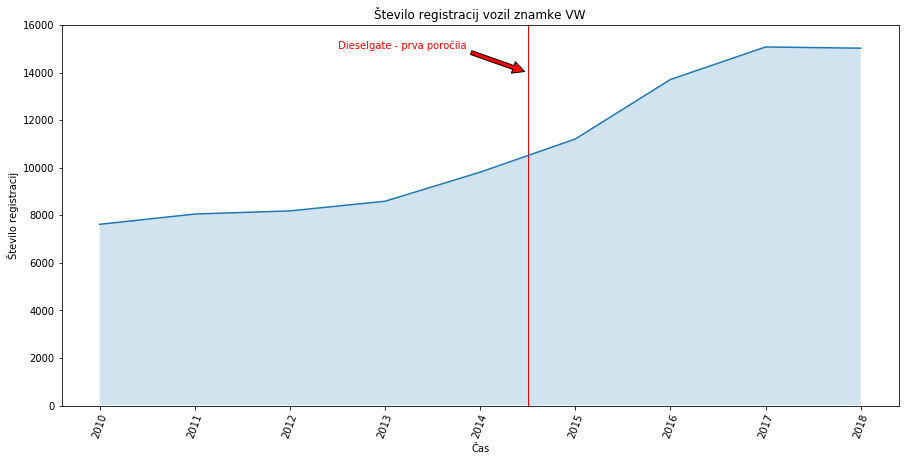

In [2]:
%store -r registracijeZnamkNaLeto
%store -r registracijeNaLeto

registracijeVW = []
registracijeTotal = []
registracijeVWPercent = []
labels = []

for i in range(2010, 2019):
    labels.append(i)
    
    registracijeTotal.append(registracijeNaLeto[str(i) +" zima"]+registracijeNaLeto[str(i) +" poletje"])
    registracijeVW.append(registracijeZnamkNaLeto[str(i)]["VOLKSWAGEN"])    
    registracijeVWPercent.append(registracijeVW[-1]/registracijeTotal[-1])
    
index = np.arange(len(registracijeVW))
plt.figure(figsize=(15,7))
plt.plot(index, registracijeVW)

plt.title('Število registracij vozil znamke VW')
plt.xlabel('Čas', fontsize=10)
plt.ylabel('Število registracij', fontsize=10)

plt.ylim(top=16000, bottom=0)
plt.xticks(index, labels, fontsize=10, rotation=70)
plt.fill_between(index, 0, registracijeVW, alpha=0.2)

plt.fill_between([4.5], [0], [16000], color="r")
plt.annotate("Dieselgate - prva poročila", xy=(4.5, 14000), xytext=(2.5, 15000), color="r", arrowprops=dict(facecolor='red', shrink=0.05))

plt.show() 

Še z odstotki...

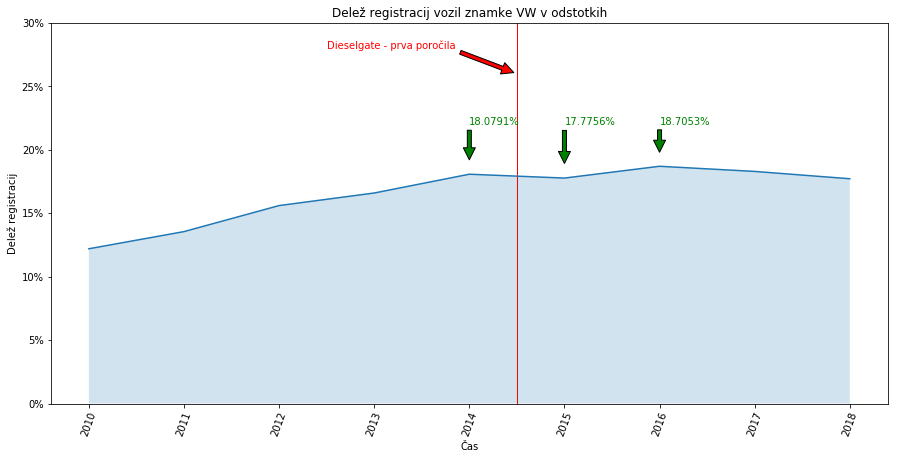

In [3]:
index = np.arange(len(registracijeVWPercent))
plt.figure(figsize=(15,7))
plt.plot(index, registracijeVWPercent)

plt.title('Delež registracij vozil znamke VW v odstotkih')
plt.xlabel('Čas', fontsize=10)
plt.ylabel('Delež registracij', fontsize=10)

plt.ylim(top=0.3,bottom=0)
plt.xticks(index, labels, fontsize=10, rotation=70)
plt.yticks(np.arange(0.00,0.301,0.05), ["0%", "5%","10%","15%","20%","25%","30%"])
plt.fill_between(index, 0, registracijeVWPercent, alpha=0.2)

plt.fill_between([4.5], [0], [0.3], color="r")
plt.annotate("Dieselgate - prva poročila", xy=(4.5, 0.26), xytext=(2.5, 0.28), color="r", arrowprops=dict(facecolor='red', shrink=0.05),)

plt.annotate(str(registracijeVWPercent[4]*100)[:7]+"%", xy=(4, registracijeVWPercent[4]+0.01), xytext=(4, 0.2+0.02), color="g", arrowprops=dict(facecolor='g', shrink=0.05),)
plt.annotate(str(registracijeVWPercent[5]*100)[:7]+"%", xy=(5, registracijeVWPercent[5]+0.01), xytext=(5, 0.2+0.02), color="g", arrowprops=dict(facecolor='g', shrink=0.05),)
plt.annotate(str(registracijeVWPercent[6]*100)[:7]+"%", xy=(6, registracijeVWPercent[6]+0.01), xytext=(6, 0.2+0.02), color="g", arrowprops=dict(facecolor='g', shrink=0.05),)


plt.show()

Kaj lahko razberemo? No ja, ~~"nepopravljive"~~ škode ni, in je verjetno tudi ne bo. Vidimo lahko, da prve registracije (kar lahko skoraj enačimo s prodajo) v letu 2015 res upadejo v primerjavi z letom 2014, ko so bile objavljene prve raziskave VW motorjev. Ampak gre za spremembo **velikosti 0.3%**. Če povemo s številkami je to **9813/54278** registriranih avtomobilov v letu 2014 in **11207/63047** registriranih avtomobilov v letu 2015.

Že v letu 2016 pa prve registracije narastejo nad delež, ki ga zasledimo pred "Dieselgate-om". Na prikazu števila registracij vidimo strm vzpon novih registracij, kljub škandalu.

Razlogov za to je več. Po eni strani, da, javnost verjetno ni bila tako prizadeta kot bi mogoče morala biti nad škandalom. 

Ampak škodo pa je takoj začel omejevati tudi **VOLKSWAGEN**. Marketing je tu naredil veliko. Kot primer, v Aziji so prodajalne **VW** ponujale popuste v višini kar **$15.000** na najnovejše modele.

### Kaj pa splošna prodaja dizel motorjev?

So se mogoče spremembe zgodile na drugih področjih? Poglejmo.

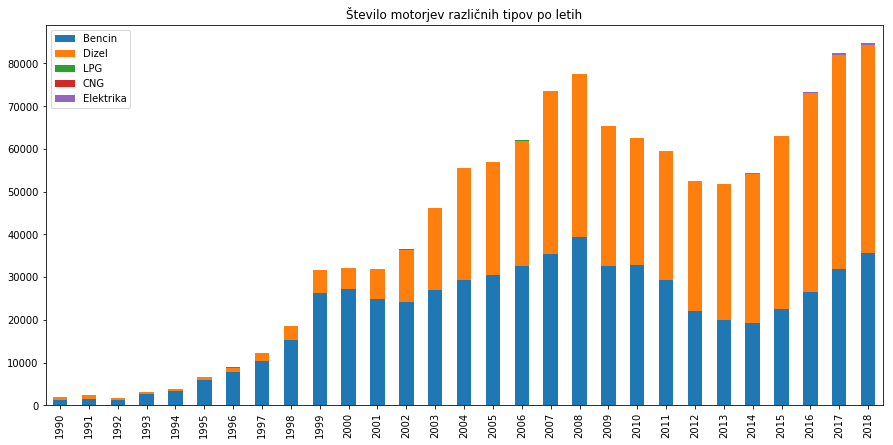

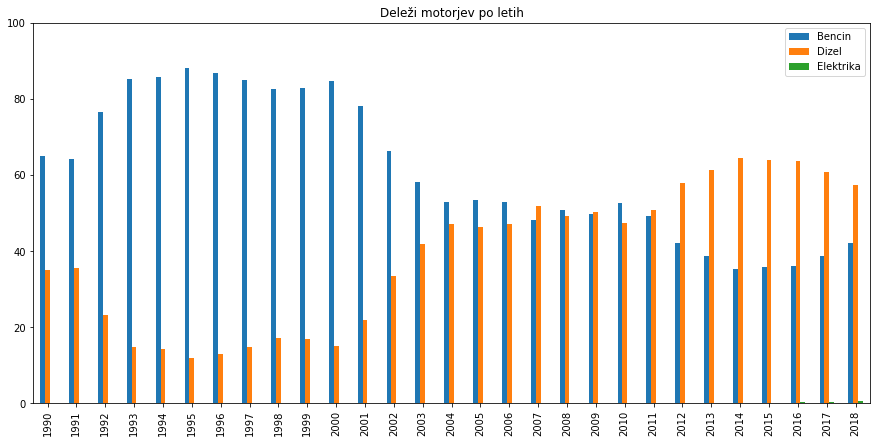

In [4]:
%store -r tipiMotorjevSkoziLeta

import pandas

dataSets = []
dataSetsPercent = []
columnNames = ["Bencin", "Dizel", "LPG", "CNG", "Elektrika"]
columnNamesPercent = ["Bencin", "Dizel", "Elektrika"]
xticksNew = []

for year in range(1990, 2019):
    dataSet = [0,0,0,0,0]
    suma = 0
    xticksNew.append(year)
    for typeOfFuel in tipiMotorjevSkoziLeta[str(year)]:
        suma = suma + tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
        if (typeOfFuel[0]=="P"):
            dataSet[0]=dataSet[0]+tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
        if (typeOfFuel[0]=="D"):
            dataSet[1]=dataSet[1]+tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
        if (typeOfFuel[0:3]=="LPG"):
            dataSet[2]=dataSet[2]+tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
        if(typeOfFuel[0:3]=="CNG"):
            dataSet[3]=dataSet[3]+tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
        if(typeOfFuel=="-"):
            dataSet[4]=dataSet[4]+tipiMotorjevSkoziLeta[str(year)][typeOfFuel]
            
    
    dataSetsPercent.append([(dataSet[0]/suma)*100, 100*(dataSet[1]/suma),100*(dataSet[4]/suma)])
    dataSets.append(dataSet)
    
            
newTicks = pandas.Series(xticksNew)
df = pandas.DataFrame(dataSets, columns = columnNames, index=xticksNew)
dfPercent = pandas.DataFrame(dataSetsPercent, columns = columnNamesPercent, index=xticksNew, )

df.plot.bar(stacked=True, figsize=(15,7), title="Število motorjev različnih tipov po letih")
dfPercent.plot.bar(stacked=False, figsize=(15,7), ylim=(0,100), title="Deleži motorjev po letih")

Tudi tukaj vidimo potditev, da je dizel zelo popularna izbira, kljub Dieselgate-u. Leta 2007 je število novih vozil z dizelskim motorjem prvič preseglo število vozil z bencinskim motorjem. 

Ampak če bojo podatki nadaljevali v trenutni smeri se dizlu mogoče obeta zaton (leta 2017 in leta 2018 vidmo rahel padec dizelskih motorjev v primerjavi z bencinskimi motorji).

Zanimiv je tudi padec splošne prodaje v obdobju od leta 2009 do 2013. Predvidevava, da je to prikaz efekta recesije.

### Zanimivosti - Dieselgate

**VOLKSWAGEN** že od leta 1964 dosega najboljše rezultate pri prodaji v Sloveniji. 
Od leta 2000 je v vodstvu sicer **RENAULT**, ampak **VOLKSWAGEN** mu tesno sledi.

## Zastava

Vsi poznamo avtomobil imenovan "fičo" (ZASTAVA 750). Pa Yugo (tudi ZASTAVA KORAL ali YUGO KORAL) nam je tudi znan, itd. 

Proizvajalec teh avtomobilov, **ZASTAVA**, je bil nekaj časa zelo popularen. Potem pa je padel pod težo političnih sankcij in novih proizvajalcev, ki so prišli na naš trg. Poglejmo grafični prikaz.

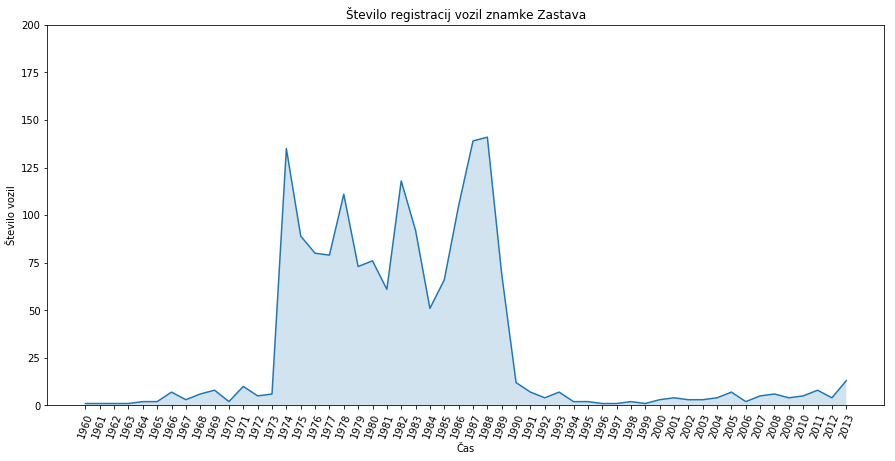

In [5]:
registracijeZastava = []
registracijeTotal = []
registracijeZastavaPercent = []
labels = []


for i in range(1960, 2019):
    labels.append(i)
    
    if (str(i) +" zima") in registracijeNaLeto and (str(i) +" poletje") in registracijeNaLeto and "ZASTAVA" in registracijeZnamkNaLeto[str(i)]:
        registracijeTotal.append(registracijeNaLeto[str(i) +" zima"]+registracijeNaLeto[str(i) +" poletje"])
        registracijeZastava.append(registracijeZnamkNaLeto[str(i)]["ZASTAVA"])  
        
        #print(str(i)+" "+str(registracijeZnamkNaLeto[str(i)]["ZASTAVA"]))
        registracijeZastavaPercent.append(registracijeZastava[-1]/registracijeTotal[-1])
        
index = np.arange(len(registracijeZastava))
plt.figure(figsize=(15,7))
plt.plot(index, registracijeZastava)

plt.title('Število registracij vozil znamke Zastava')
plt.xlabel('Čas', fontsize=10)
plt.ylabel('Število vozil', fontsize=10)

plt.ylim(top=200, bottom=0)
plt.xticks(index, labels, fontsize=10, rotation=70)
plt.fill_between(index, 0, registracijeZastava, alpha=0.2)

plt.show()

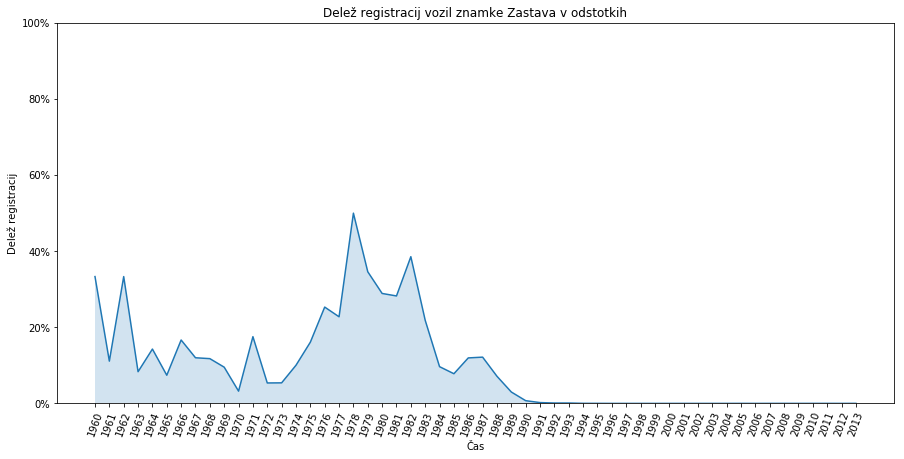

In [6]:
index = np.arange(len(registracijeZastavaPercent))
plt.figure(figsize=(15,7))
plt.plot(index, registracijeZastavaPercent)

plt.title('Delež registracij vozil znamke Zastava v odstotkih')
plt.xlabel('Čas', fontsize=10)
plt.ylabel('Delež registracij', fontsize=10)

plt.ylim(top=1,bottom=0)
plt.xticks(index, labels, fontsize=10, rotation=70)
plt.yticks(np.arange(0.00,1.01,0.2), ["0%", "20%","40%","60%","80%","100%"])
plt.fill_between(index, 0, registracijeZastavaPercent, alpha=0.2)
plt.show()

Na grafih lepo vidimo obdobje bivše Jugoslavije, ko je bila znamka med najpopularnejšimi avtomobili pri nas. Leta 1978 je **ZASTAVA** predstavljala skoraj 60% vseh novih registracij. 

V začetku 90ih let pa vidimo rezultat raznih omejitev pri izvozu, ki so jih postavili Združeni narodi v tistem času, ter pričetek padca znamke.

Treba je omeniti še nekaj. Na grafu, ki prikazujejo število registracij na leto vidimo, da so števila relativno nizka - tudi v najboljših letih ne zrastejo nad **150 registracij na leto**. 

Predvidevava da je to zato, ker v podatkovni bazi **verjetno** niso vključena vozila, ki so bila kadarkoli **odjavljena iz prometa**. Kar pomeni, da lahko rečemo, da je približno **1250 vozil** znamke **ZASTAVA** še vedno na naših cestah v aktivni uporabi ali v muzejih.

### Zanimivosti - Zastava

V letu 2018 je bilo v Sloveniji prvič registriranih 13 vozil **ZASTAVA**. Podjetje je prenehalo z lastni proizvodnjo že več kot desetletje nazaj. Kako je to mogoče? 

Predvidevava, da so bili ti avtomobili uvoženi iz drugih držav (verjetno drugih držav bivše Jugoslavije). Gre namreč večinoma za vozila **ZASTAVA 750, ZASTAVA 600** itd.

# Starosti udeležencev v prometu

Kako pa je v Sloveniji z starostjo lastnikov oz. uporabnikov vozil? Pričakovali bi, da zaradi padca cen rabljenih avtomobilov in pričakovanja, sploh s strani delodajalcev, da ima posameznik svoj avtomobil, veliko lastnikov/uporabnikov, ki so mlajši - v območju 30ih let. Pa poglejmo.

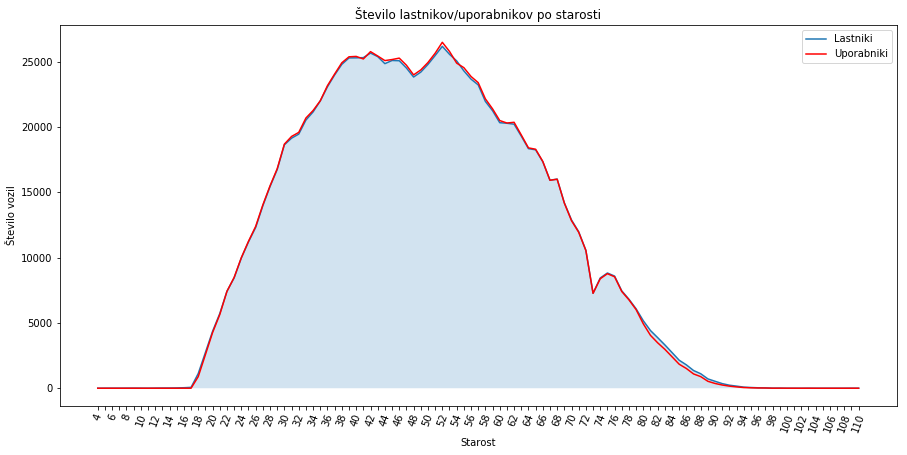

In [7]:
%store -r starostiLastnikov
%store -r starostiUporabnikov

seznamStarostiLastnikovLabel = []
seznamStarostiLastnikov=np.zeros(107)

seznamStarostiUporabnikovLabel = []
seznamStarostiUporabnikov=np.zeros(107)
for starost in range(4,111):
    
    if(starost%2==0):
        seznamStarostiLastnikovLabel.append(str(starost))
    else:
        seznamStarostiLastnikovLabel.append("")
    
    if(str(starost) in starostiLastnikov):    
        seznamStarostiLastnikov[starost-4]=starostiLastnikov[str(starost)]
    
    if(starost%2==0):
        seznamStarostiUporabnikovLabel.append(str(starost))
    else:
        seznamStarostiUporabnikovLabel.append("")
    
    if(str(starost) in starostiUporabnikov):
        seznamStarostiUporabnikov[starost-4]=starostiUporabnikov[str(starost)]
        
        
index = np.arange(len(seznamStarostiLastnikov))
plt.figure(figsize=(15,7))
plt.plot(index, seznamStarostiLastnikov, label="Lastniki")
plt.fill_between(index, 0, seznamStarostiLastnikov, alpha=0.2)

plt.plot(index, seznamStarostiUporabnikov, color="r", label="Uporabniki")

plt.title('Število lastnikov/uporabnikov po starosti')
plt.xlabel('Starost', fontsize=10)
plt.ylabel('Število vozil', fontsize=10)

plt.legend()

plt.xticks(index, seznamStarostiLastnikovLabel, fontsize=10, rotation=70)

plt.show()

Vidimo lahko, da se naša teorija potrdi. Vzpon se začne pri 18 letih, največ lastnikov je starih med 30 in 50 let, z vrhom pri približno 52 letih.

Če izrišemo še uporabnike vozil (uporabnik in lastnik sta lahko dve različni osebi) ne opazimo veliko sprememb. Graf je malce bolj sploščen pri starejših (>70 let).

### Zanimivosti - starosti udeležencev

Najmlajši **lastnik** avtomobila v Sloveniji je star **4 leta**. Najstarejši **lastnik** pa **110 let**. Najmlajši **navedeni uporabnik** je star **12 let**, najstarejši pa ponovno **110 let**.

Zanimiva stvar je, da je sta bila najstarejši Slovenec in najstarejša Slovenka res stara **110 let** (oba sta že pokojna, najstarejši Slovenec je umrl 31. marca 2018).

Druga zanimivost pa je **najmlajši uporabnik**, saj je **zakonsko nemogoče**, da je uporabnik osebnega vozila **12 letnik**.

Pri lastništvu pa se pojavi druga zgodba, saj je **popolnoma možno**, da je otrok, star **4 leta**, pač vozilo **podedoval** od sorodnikov ali kaj podobnega.

## Kaj pa znamke?

Kako pa je z znamkami v odvisnosti od starosti voznika? Starost sva razdelila v tri kategorije: **18-30 let**, **30-50 let** ter **50+ let**. Pa poglejmo rezultate.

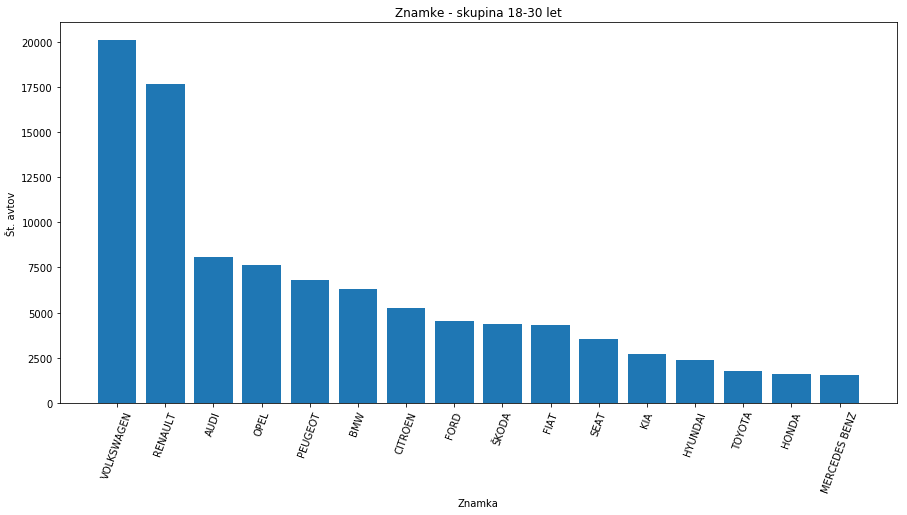

In [8]:
%store -r starostiZnamke

starostnaSkupina1830 = sorted(starostiZnamke["18-30"].items(), key= operator.itemgetter(1), reverse=True)
starostnaSkupina3050 = sorted(starostiZnamke["30-50"].items(), key= operator.itemgetter(1), reverse=True)
starostnaSkupina50P = sorted(starostiZnamke["50+"].items(), key= operator.itemgetter(1), reverse=True)

starosti1830=[]
starosti1830Labels=[]

starosti3050=[]
starosti3050Labels=[]

starosti50P=[]
starosti50PLabels=[]

for i in range(0,16):
    starosti1830.append(starostnaSkupina1830[i][1])
    starosti1830Labels.append(starostnaSkupina1830[i][0])
    
    starosti3050.append(starostnaSkupina3050[i][1])
    starosti3050Labels.append(starostnaSkupina3050[i][0])
    
    starosti50P.append(starostnaSkupina50P[i][1])
    starosti50PLabels.append(starostnaSkupina50P[i][0])
    
index = np.arange(len(starosti1830))
    
plt.figure(figsize=(15,7))
plt.bar(index, starosti1830)
plt.xlabel('Znamka', fontsize=10)
plt.ylabel('Št. avtov', fontsize=10)
plt.xticks(index, starosti1830Labels, fontsize=10, rotation=70)
plt.title('Znamke - skupina 18-30 let')
plt.show()

V starostni skupini od **18-30 let** se stanje ne spremeni dosti v primerjavi s povprečjem. Na vrhu še vedno najdemo **VOLKSWAGEN** in **RENAULT**. 

Osebno naju je zelo presentil **AUDI**, ki se nahaja na tretjem mestu, ter **BMW**, ki se nahaja na petem mestu.

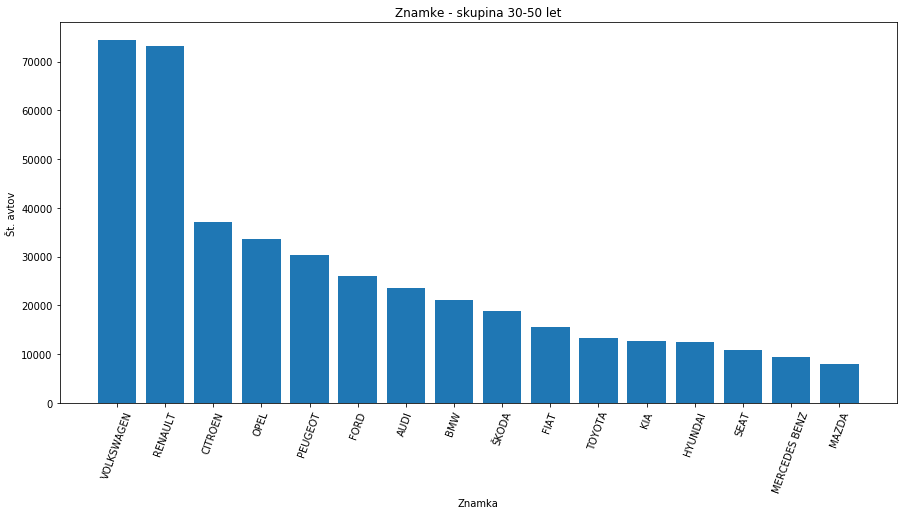

In [9]:
index = np.arange(len(starosti3050))

plt.figure(figsize=(15,7))
plt.bar(index, starosti3050)
plt.xlabel('Znamka', fontsize=10)
plt.ylabel('Št. avtov', fontsize=10)
plt.xticks(index, starosti3050Labels, fontsize=10, rotation=70)
plt.title('Znamke - skupina 30-50 let')
plt.show()

V starostni skupini 30-50 ponovno prevladujeta **VOLKSWAGEN** in **RENAULT**. Tretje mesto zasede **CITROEN**, ki ima v primerjavi s skupino **18-30 let** največji vzpon (iz sedmega mesta, na tretje mesto).

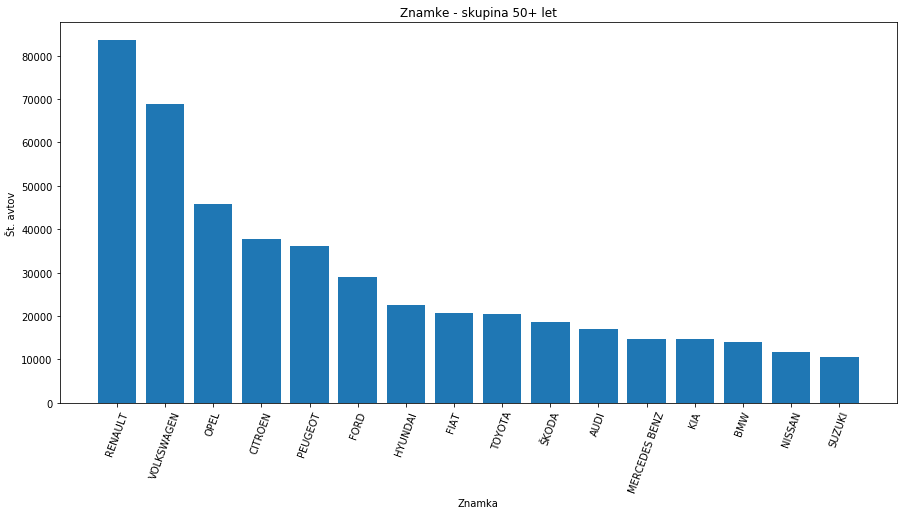

In [10]:
index = np.arange(len(starosti50P))

plt.figure(figsize=(15,7))
plt.bar(index, starosti50P)
plt.xlabel('Znamka', fontsize=10)
plt.ylabel('Št. avtov', fontsize=10)
plt.xticks(index, starosti50PLabels, fontsize=10, rotation=70)
plt.title('Znamke - skupina 50+ let')
plt.show()

V starostni skupini **50+ let** ima veliko prevlado **RENAULT**, kakšnih **20%** manj avtomobilov pa je znamke **VOLKSWAGEN**. Povzpne se tudi **OPEL**, v obeh prejšnjnih skupinah zasede četrto mesto, tu pa zasede tretje, s krepko prednostjo pred četrtim mestom. Četrto mesto tokrat zasede **CITROEN**, za katerega lahko rečemo, da je izmed najpopularjenših znamk najmanj priljubljen pri mlajših voznikih.

Ostale znamke pa ostajajo več ali manj enake.

### Zanimivosti - znamke v odvisnosti od starosti

**PORSCHE** je znan kot nemški proizvajalec hitrih super-avtomobilov, ki vedno dosegajo dobre ocene v raznih preizkusih in ocenah revij.

Znani pa so tudi po tem, da so velikokrat označeni kot proizvajalec, ki je popularen pri ljudeh, ki imajo krizo srednjih let. Recimo Jeremy Clarkson je ta mit večkrat uporabil v priljubljeni avtomobilistični seriji Top Gear. Pa je to res mit, ali je v tem kaj resnice?

Če filtriramo podatke ugotovimo, da je **36** lastnikov znmake **PORSCHE** med **18 in 30 let**, **380** v skupini od **30 do 50 let**, kar **415** pa v skupini **50+ let**.

# Zakluček

S kolegom sva bila zelo presenečena nad rezultati najinega kopanja skozi podatke.

Misliva, da sva lepo pokazala podatke v zvezi s političnimi in ekonomskimi spremembami, ki jih je doživela naša država skozi zgodovino.